In [1]:
import numpy as np
import os
from netCDF4 import Dataset
from skimage.measure import block_reduce

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import os, sys
module_path = os.path.abspath(os.path.join('C:/Users/Adam.000/Dropbox/Code/DisCo/'))
sys.path.append(module_path)
from visuals import *

In [3]:
matplotlib.use("TkAgg")
%matplotlib inline

### first, use `skimage.measure.block_reduce` to perform 4x4 mean pooling and create low-res version of the climate data

In [4]:
run_dir =  "D:/Adam/Extracted-Disco-Data/AR-Extracted-Data/netcdf_data/"
runfiles = sorted(os.listdir(run_dir))
new_dir = "D:/Adam/Extracted-Disco-Data/AR-Extracted-Data/reduced_npy_data/"

In [5]:
for file in runfiles:
    tmq = Dataset(run_dir+file, 'r')["TMQ"][:]
    tmq_red = block_reduce(tmq, block_size=(1,4,4), func=np.mean)
    # np.save(new_dir+"TMQ/"+file[:-9]+".npy", tmq_red)
    
    u850 = Dataset(run_dir+file, 'r')['U850'][:]
    u850_red = block_reduce(u850, block_size=(1,4,4), func=np.mean)
    # np.save(new_dir+"U850/"+file[:-9]+".npy", u850_red)
    
    v850 = Dataset(run_dir+file, 'r')['V850'][:]
    v850_red = block_reduce(v850, block_size=(1,4,4), func=np.mean)
    # np.save(new_dir+"V850/"+file[:-9]+".npy", v850_red)

### create figures, including low-res segmentation results run on Perlmutter with above low-res data

In [7]:
states = np.load("D:/Adam/Extracted-Disco-Data/IVT_alt_red/LCS_1deg_reduced-full-3.npy")

In [8]:
state_field = np.roll(states,144, axis=2)
filteredIVT = np.copy(state_field)
filteredIVT[state_field==8] = 0

In [9]:
maskedIVT = np.ma.masked_array(filteredIVT, filteredIVT==0)

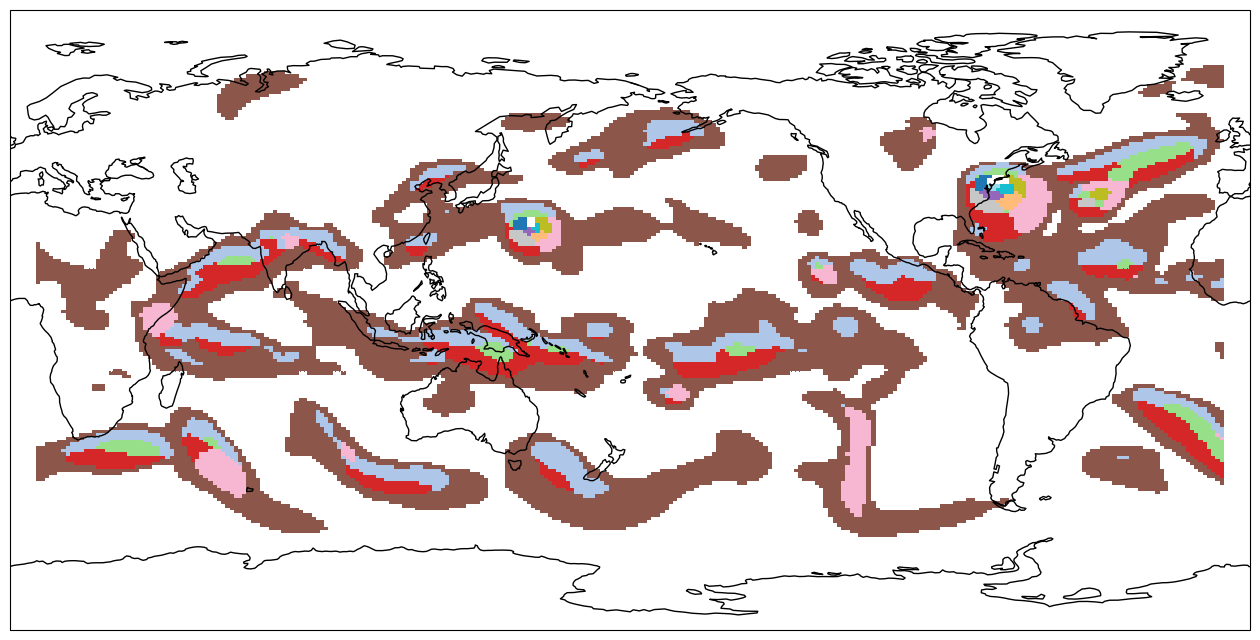

In [11]:
ind = 112

H,W = np.shape(maskedIVT[ind])
size = 16
fig = plt.figure(figsize = (size, (H/W)*size))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.0))
ax.imshow(maskedIVT[ind], transform=ccrs.PlateCarree(), cmap=plt.cm.tab20, origin='lower')
ax.coastlines()
ax.tick_params(axis='both',
                        which='both',
                        bottom=False,
                        top=False,
                        left=False,
                        right=False,
                        labelleft=False,
                        labelbottom=False)
# plt.savefig('ivt_alt_red_states-3.pdf', bbox_inches='tight')

In [15]:
new_dir = "D:/Adam/Extracted-Disco-Data/AR-Extracted-Data/reduced_npy_data/TMQ/"
runfiles = sorted(os.listdir(new_dir))
lowres_field = np.vstack([np.load(new_dir + f) for f in runfiles])

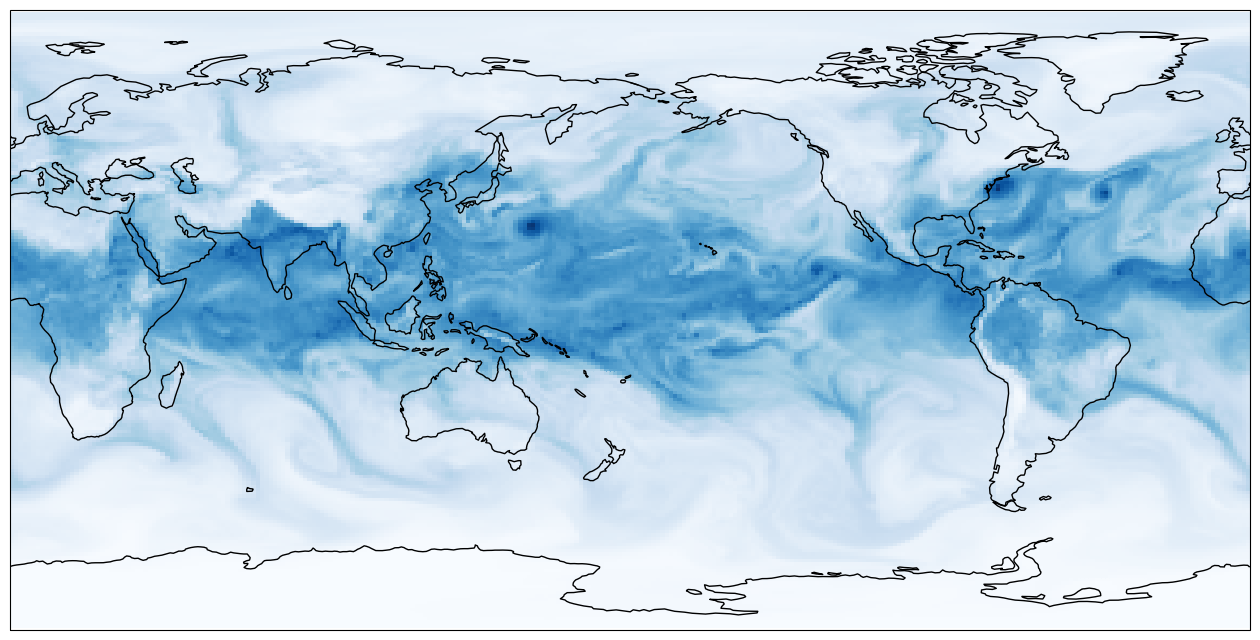

In [16]:
ind = 112

H,W = np.shape(maskedIVT[ind])
size = 16
fig = plt.figure(figsize = (size, (H/W)*size))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.0))
ax.imshow(np.roll(lowres_field, 144, axis=2)[ind], transform=ccrs.PlateCarree(), cmap=plt.cm.Blues, origin='lower')
ax.coastlines()
ax.tick_params(axis='both',
                        which='both',
                        bottom=False,
                        top=False,
                        left=False,
                        right=False,
                        labelleft=False,
                        labelbottom=False)
# plt.savefig('tmq_low_res.pdf', bbox_inches='tight')

In [13]:
run_dir =  "D:/Adam/Extracted-Disco-Data/AR-Extracted-Data/netcdf_data/"
runfiles = sorted(os.listdir(run_dir))
highres_field = np.vstack([Dataset(run_dir+f, 'r')["TMQ"][:] for f in runfiles])

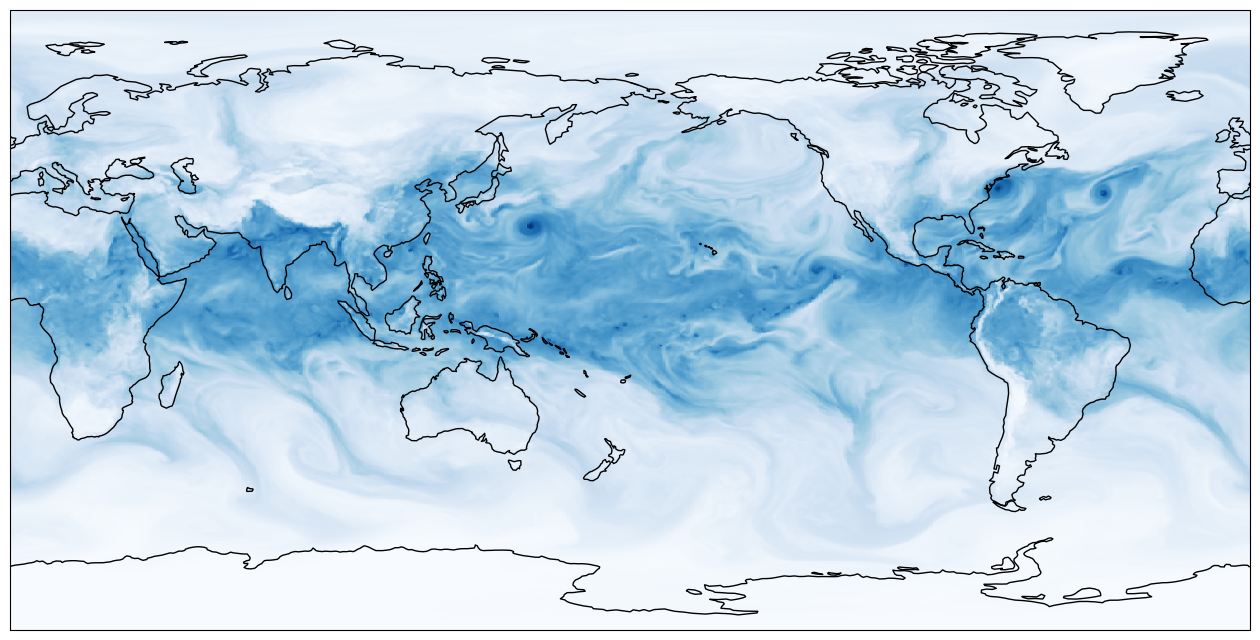

In [14]:
ind = 112

H,W = np.shape(maskedIVT[ind])
size = 16
fig = plt.figure(figsize = (size, (H/W)*size))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.0))
ax.imshow(np.roll(highres_field, 576, axis=2)[ind], transform=ccrs.PlateCarree(), cmap=plt.cm.Blues, origin='lower')
ax.coastlines()
ax.tick_params(axis='both',
                        which='both',
                        bottom=False,
                        top=False,
                        left=False,
                        right=False,
                        labelleft=False,
                        labelbottom=False)
# plt.savefig('tmq_high_res.pdf', bbox_inches='tight')